In [2]:
from ROOT import TFile,TTree,TH1F,gStyle,TLatex,TCanvas,TGraphErrors,TLegend,TH2F,TLine,TGraph,gPad,TGraph2D,TFitResultPtr
%run toolkit.ipynb
import matplotlib.pyplot as plt

latex=TLatex()
latex.SetTextSize(0.03)

biglatex=TLatex()
biglatex.SetTextSize(0.05)

gStyle.SetTitleXSize(0.045)
gStyle.SetTitleYSize(0.045)

Welcome to JupyROOT 6.24/02


In [3]:
fIn = TFile("data/paper_ed_beamE_8.80_evts_50000000_process_photo_coherent_detector_SoLID_model_PomeronLQCD.root","READ")
tree = fIn.Get("tree")
lumi    = 0.5 * 1.2e37 * 1.0e-24 * 1.0e-9 * 3600.0 * 24 * 50

In [4]:
def create_graph(Egmin,Egmax,tVals):
    if(not np.any(np.array(EgArray)==Egmin)):
        EgArray.append(Egmin)
    EgArray.append(Egmax)
    tArray.append(tVals)
    Egmid.append((Egmax+Egmin)/2)

In [5]:
tArray = []
EgArray = []
Egmid = []
create_graph(5.67,7,[0,0.125,0.25,0.4,0.6,0.75,1,1.2,1.5,1.75,2.25,3])
create_graph(7,7.33,[0,0.2,0.45,0.6,1,1.25,1.5,2,2.25,3])
create_graph(7.33,7.66,[0,0.2,0.45,0.6,1,1.25,1.5,2,2.25,3])
create_graph(7.66,8,[0,0.1,0.2,0.3,0.4,0.5,0.6,1,1.5,3])
create_graph(8,8.4,[0,0.1,0.2,0.3,0.4,0.5,0.6,1,3])
create_graph(8.4,8.8,[0,0.1,0.2,0.3,0.4,0.5,0.6,1,3])

In [6]:
tgs = get_dsigdts(tree,lumi,5e7,0.02,
                    tArray,
                    EgArray)

Spawning TGraph 1/6
Spawning TGraph 2/6
Spawning TGraph 3/6
Spawning TGraph 4/6
Spawning TGraph 5/6
Spawning TGraph 6/6
Completed 0 events out of 8992307 in TTree
Completed 100000 events out of 8992307 in TTree
Completed 200000 events out of 8992307 in TTree
Completed 300000 events out of 8992307 in TTree
Completed 400000 events out of 8992307 in TTree
Completed 500000 events out of 8992307 in TTree
Completed 600000 events out of 8992307 in TTree
Completed 700000 events out of 8992307 in TTree
Completed 800000 events out of 8992307 in TTree
Completed 900000 events out of 8992307 in TTree
Completed 1000000 events out of 8992307 in TTree
Completed 1100000 events out of 8992307 in TTree
Completed 1200000 events out of 8992307 in TTree
Completed 1300000 events out of 8992307 in TTree
Completed 1400000 events out of 8992307 in TTree
Completed 1500000 events out of 8992307 in TTree
Completed 1600000 events out of 8992307 in TTree
Completed 1700000 events out of 8992307 in TTree
Completed 180

In [11]:
A,oA,B,oB,chi2,ndf,integral,integral_error = do_fits(tgs, EgArray)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


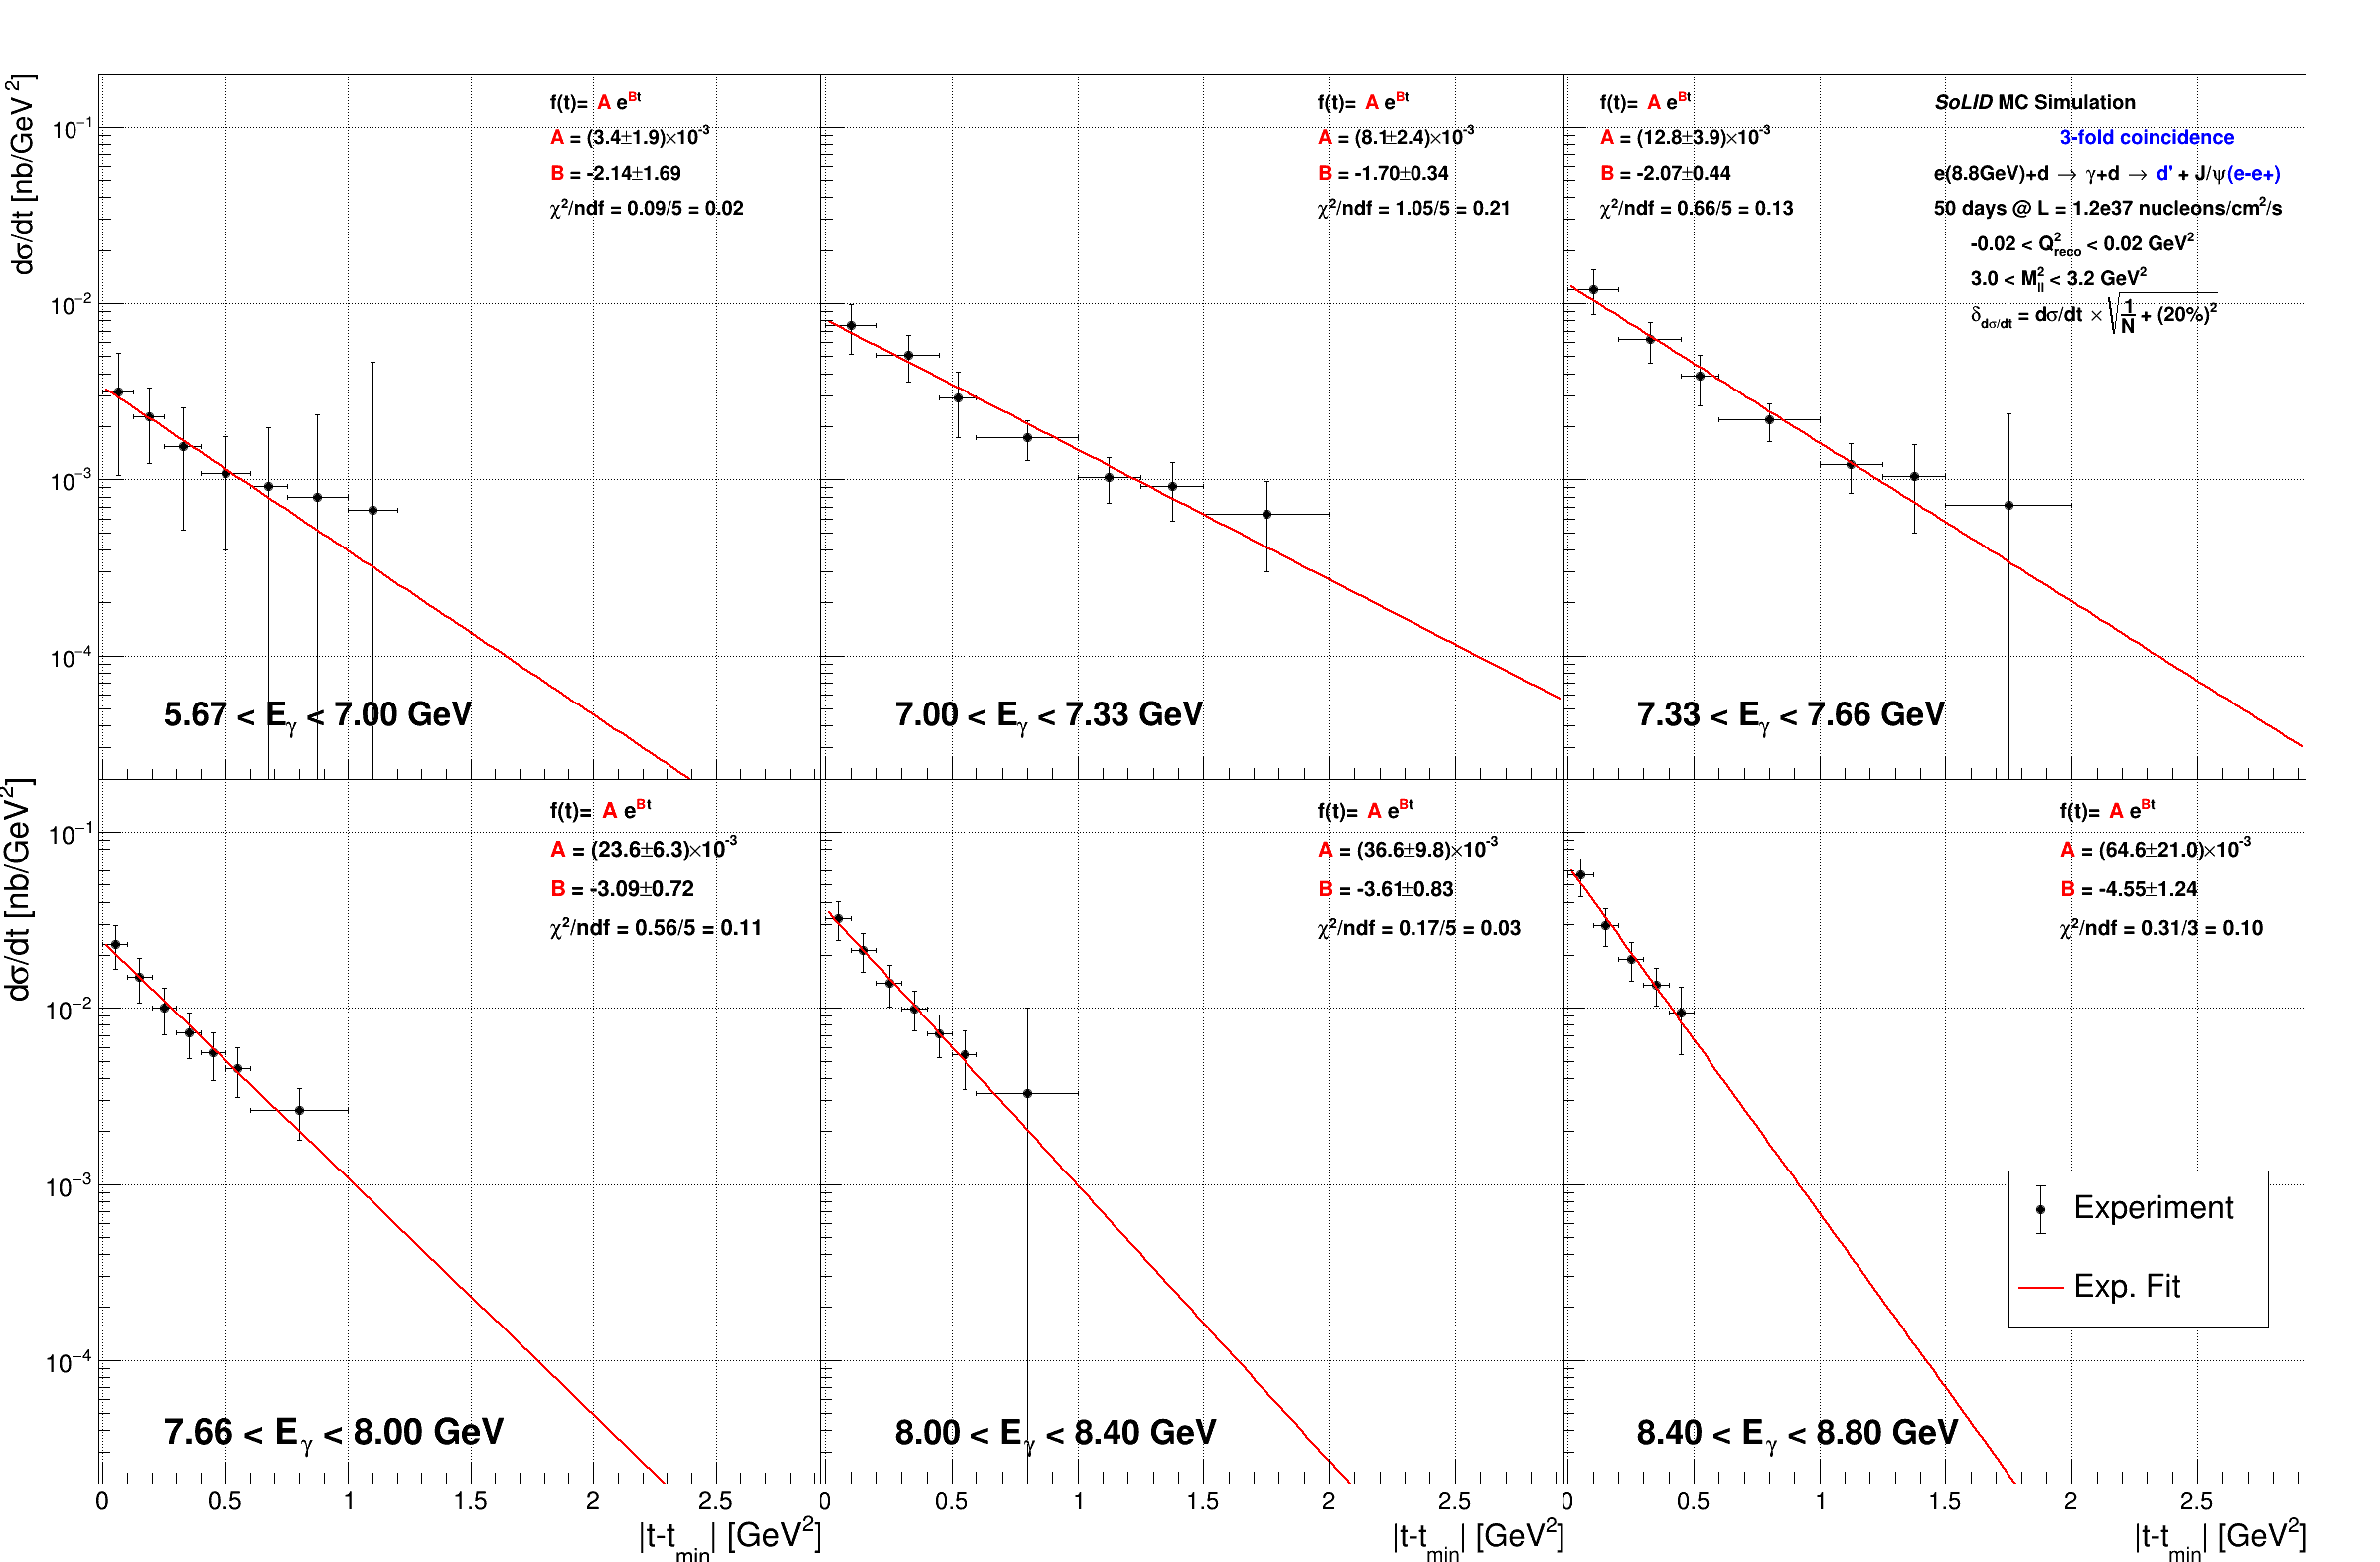

In [12]:
%run toolkit.ipynb
c = TCanvas("c","c",2400,1600)
c.Divide(3,2,0.01,0.00)
f=[]
for i in range(6):
    c.cd(i+1)
    tgs[i].SetTitle(";|t-t_{min}| [GeV^{2}];d#sigma/dt [nb/GeV^{2}]")
    f.append(TF1("f","{}*exp({}*x)".format(A[i],B[i]),0,3))
    tgs[i].GetXaxis().SetRangeUser(0,3)
    tgs[i].GetXaxis().SetLimits(0.01,2.9)
    tgs[i].SetMarkerStyle(20)
    tgs[i].GetYaxis().SetRangeUser(2e-5,2e-1)
    tgs[i].Draw("AP")
    f[i].Draw("same")
    gPad.SetLogy(1)
    gPad.SetGrid()
    if(i<3):
        gPad.SetBottomMargin(0)
        gPad.SetTopMargin(0.)
    else:
        gPad.SetBottomMargin(0.1)
        gPad.SetTopMargin(0)
        
    if(i==0 or i==3):
        gPad.SetLeftMargin(0.12)
    gPad.RedrawAxis()
    
    drawLatex(i,8.8,50,EgArray,A,oA,B,oB,chi2,ndf,integral,integral_error,latex,biglatex)
    legend=TLegend(0.6,0.3,0.95,0.5)
    legend.AddEntry(tgs[i],"Experiment","pe")
    legend.AddEntry(f[i],"Exp. Fit","l")
    legend.Draw("same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


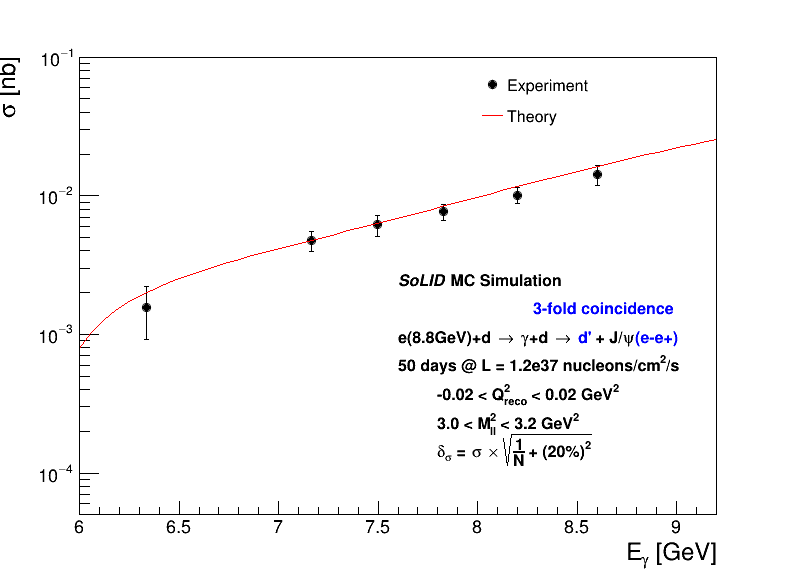

In [20]:
sigmaplot = get_sigma(Egmid,integral,integral_error)
sigmaplot.GetYaxis().SetRangeUser(5e-5,0.1)
sigmaplot.GetXaxis().SetLimits(6,9.2)
truesigmaplot = get_true_sigma()
sigmaplot.SetTitle(";E_{#gamma} [GeV];#sigma [nb]")
c=TCanvas("c","c",800,600)
sigmaplot.Draw("AP")
truesigmaplot.Draw("l same")
sigmaplot.SetMarkerStyle(20)
latex.DrawLatexNDC(.5,.5,"#it{SoLID} MC Simulation")
latex.DrawLatexNDC(.67,.45,"#color[4]{3-fold coincidence}")
latex.DrawLatexNDC(.5,.4,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(8.8) + "#color[4]{d'} + J/#psi#color[4]{(e-e+)}")
latex.DrawLatexNDC(.5,.35,"{} days @ L = 1.2e37 nucleons/".format(50)+"cm^{2}/s")
latex.DrawLatexNDC(.55,.3,"-0.02 < Q^{2}_{reco} < 0.02 GeV^{2}")
latex.DrawLatexNDC(.55,.25,"3.0 < M_{ll}^{2} < 3.2 GeV^{2}")
latex.DrawLatexNDC(.55,.2,"#delta_{#sigma} = #sigma #times #sqrt{#frac{1}{N} + (20%)^{2}}")

legend=TLegend(0.6,0.77,0.75,0.88)
legend.SetBorderSize(0)
legend.AddEntry(sigmaplot,"Experiment","p")
legend.AddEntry(truesigmaplot,"Theory","l")
legend.Draw()
c.SetLogy(1)
c.Draw()

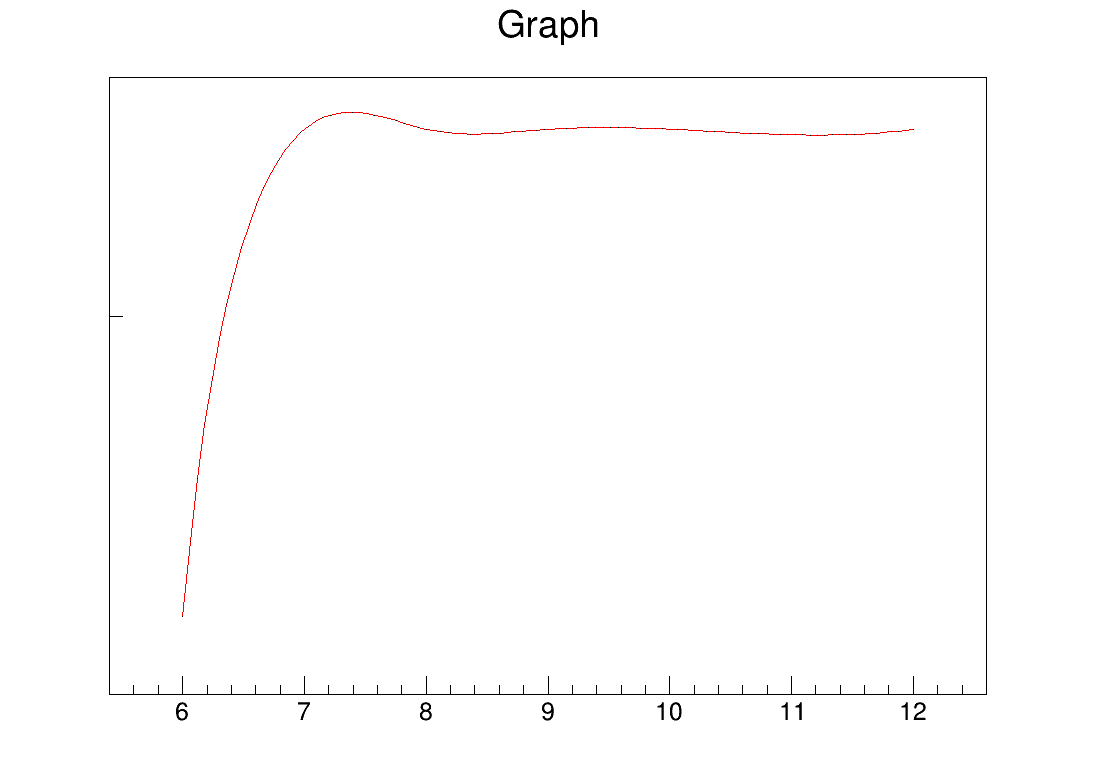

In [21]:
truesigmaplot.Draw("ALP")
c.Draw()

In [25]:
truesigmaplot.GetPointY(3)

1.714077344611235e-05

In [10]:
integral_error

[1.2099908583614007e+51,
 0.0007921301641715989,
 0.0010859773532477396,
 0.0010057246158106266,
 0.0013568511075660599,
 0.002282580638275499]